In [1]:
#importing libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#cleaning both data sets and merge the apps and reviews into one csv
df = pd.read_csv(r'C:\Users\User\OneDrive\Desktop\Portfolio Project\Python\Python_GooglePlayStore_DataCleaning\googleplaystore.csv')
rev = pd.read_csv(r'C:\Users\User\OneDrive\Desktop\Portfolio Project\Python\Python_GooglePlayStore_DataCleaning\googleplaystore_user_reviews.csv')

### Reviewing the Dataframe

In [2]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [3]:
#checking the data types of each column
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [4]:
#checking how many null values are in each column
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Exploring the Columns and Data Cleaning

In [5]:
#all columns will be explored except name
#checking values in Category and see if that is any anomaly
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [6]:
anomaly = df[df['Category']=='1.9']
anomaly

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [7]:
#row to be dropped
anomaly = df[df['Category']=='1.9']
df.drop(anomaly.index, inplace=True)

In [8]:
#checking the values in the rating columns 
df['Rating'].value_counts()

4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.7      25
2.6      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
2.1       8
1.8       8
1.7       8
1.6       4
1.5       3
1.4       3
1.2       1
Name: Rating, dtype: int64

In [9]:
#checking the numbner of null values in the rating columns 
df['Rating'].isnull().sum()

1474

In [10]:
#for null values in rating, rating;s median value will be allocated to null values
median_val = df['Rating'].median()
df['Rating'].fillna(median_val,inplace=True)

In [11]:
#checking the values in the reviews column
df['Reviews'].value_counts()

0         596
1         272
2         214
3         175
4         137
         ... 
857215      1
2294        1
455         1
124346      1
39878       1
Name: Reviews, Length: 6001, dtype: int64

In [12]:
#converting reviews to numeric data type
df['Reviews'] = pd.to_numeric(df['Reviews'])

In [13]:
#checking unique values in Size column
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [14]:
#converting k and M into their respective numerical magnitude and converting 'varies with device' to 0
#in order to convert to numeric data type
df['Size'] = df['Size'].str.replace('k','e+3').str.replace('M','e+6').str.replace('Varies with device','0')

In [15]:
#checking to confirm changes have been made
df['Size'].unique()

array(['19e+6', '14e+6', '8.7e+6', '25e+6', '2.8e+6', '5.6e+6', '29e+6',
       '33e+6', '3.1e+6', '28e+6', '12e+6', '20e+6', '21e+6', '37e+6',
       '2.7e+6', '5.5e+6', '17e+6', '39e+6', '31e+6', '4.2e+6', '7.0e+6',
       '23e+6', '6.0e+6', '6.1e+6', '4.6e+6', '9.2e+6', '5.2e+6', '11e+6',
       '24e+6', '0', '9.4e+6', '15e+6', '10e+6', '1.2e+6', '26e+6',
       '8.0e+6', '7.9e+6', '56e+6', '57e+6', '35e+6', '54e+6', '201e+3',
       '3.6e+6', '5.7e+6', '8.6e+6', '2.4e+6', '27e+6', '2.5e+6', '16e+6',
       '3.4e+6', '8.9e+6', '3.9e+6', '2.9e+6', '38e+6', '32e+6', '5.4e+6',
       '18e+6', '1.1e+6', '2.2e+6', '4.5e+6', '9.8e+6', '52e+6', '9.0e+6',
       '6.7e+6', '30e+6', '2.6e+6', '7.1e+6', '3.7e+6', '22e+6', '7.4e+6',
       '6.4e+6', '3.2e+6', '8.2e+6', '9.9e+6', '4.9e+6', '9.5e+6',
       '5.0e+6', '5.9e+6', '13e+6', '73e+6', '6.8e+6', '3.5e+6', '4.0e+6',
       '2.3e+6', '7.2e+6', '2.1e+6', '42e+6', '7.3e+6', '9.1e+6', '55e+6',
       '23e+3', '6.5e+6', '1.5e+6', '7.5e+6', '51

In [16]:
#converting size column to numerical from object
df['Size'] = pd.to_numeric(df['Size'])

In [17]:
#checking the value count and value under Installs column
df['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

In [18]:
#stripping the + sign at the back of the values
df['Installs'] = df['Installs'].str.strip('+')

In [19]:
#removing the commas in the values under Install columns to conver to numeric
df['Installs'] = df['Installs'].str.replace(',','')

In [20]:
#converting installs column to numeric data type
df['Installs'] = pd.to_numeric(df['Installs'])

In [21]:
#checking the various values in Type column
df['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [22]:
#determine which rows has the null values in the type column
df[df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.3,0,0.0,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [23]:
#replacing the null value with Free as the price is zero
df.at[9148,'Type']= 'Free'

In [24]:
#checking the various values in price column
df['Price'].value_counts()

0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$3.08         1
$2.56         1
$4.85         1
$19.40        1
$4.60         1
Name: Price, Length: 92, dtype: int64

In [25]:
#removing the dollar sign and converting the column to numertic data tpe
df['Price'] = df['Price'].str.strip('$')
df['Price'] = pd.to_numeric(df['Price'])

In [26]:
#checking the content rating column for any issues, which seems like theres no issues
df['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [27]:
#checking of the genre rating column
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [28]:
#to split genres into new columns primary genre and secondary genre
df['PriGenre'] = df['Genres'].apply(lambda x: x.split(';')[0])
df['SecGenre'] = df['Genres'].apply(lambda x: x.split(';')[-1])
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,PriGenre,SecGenre
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Art & Design,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Art & Design,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Art & Design,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Art & Design,Creativity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,Education,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,Education,Education
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9500000.0,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,Medical,Medical
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,Books & Reference,Books & Reference


In [29]:
#checking the values in last updated columm
df['Last Updated'].value_counts()

August 3, 2018        326
August 2, 2018        304
July 31, 2018         294
August 1, 2018        285
July 30, 2018         211
                     ... 
February 10, 2016       1
February 3, 2013        1
May 25, 2016            1
September 13, 2013      1
March 16, 2011          1
Name: Last Updated, Length: 1377, dtype: int64

In [30]:
# convert last update column to date time
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [31]:
#checking values for current ver column
df['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [32]:
#checking how many null values current ver column has
df['Current Ver'].isnull().sum()

8

In [33]:
#checking the rows with null values in Current Ver Col
df[df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,PriGenre,SecGenre
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700000.0,5000,Free,0.00,Everyone,Art & Design,2018-06-06,NaN,4.2 and up,Art & Design,Art & Design
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11000.0,1000000,Free,0.00,Everyone,Libraries & Demo,2013-02-12,NaN,1.5 and up,Libraries & Demo,Libraries & Demo
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700000.0,500000,Free,0.00,Everyone,Tools,2017-05-10,NaN,4.0 and up,Tools,Tools
6803,BT Master,FAMILY,4.3,0,222000.0,100,Free,0.00,Everyone,Education,2016-11-06,NaN,1.6 and up,Education,Education
7333,Dots puzzle,FAMILY,4.0,179,14000000.0,50000,Paid,0.99,Everyone,Puzzle,2018-04-18,NaN,4.0 and up,Puzzle,Puzzle
7407,Calculate My IQ,FAMILY,4.3,44,7200000.0,10000,Free,0.00,Everyone,Entertainment,2017-04-03,NaN,2.3 and up,Entertainment,Entertainment
7730,UFO-CQ,TOOLS,4.3,1,237000.0,10,Paid,0.99,Everyone,Tools,2016-07-04,NaN,2.0 and up,Tools,Tools
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.3,8,658000.0,1000,Free,0.00,Everyone,Books & Reference,2017-01-31,NaN,3.0 and up,Books & Reference,Books & Reference


In [34]:
#assumed that null values under current version is considered to be 1.0.0
df[df['Current Ver'].isnull()].fillna('1.0.0')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,PriGenre,SecGenre
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700000.0,5000,Free,0.00,Everyone,Art & Design,2018-06-06,1.0.0,4.2 and up,Art & Design,Art & Design
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11000.0,1000000,Free,0.00,Everyone,Libraries & Demo,2013-02-12,1.0.0,1.5 and up,Libraries & Demo,Libraries & Demo
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700000.0,500000,Free,0.00,Everyone,Tools,2017-05-10,1.0.0,4.0 and up,Tools,Tools
6803,BT Master,FAMILY,4.3,0,222000.0,100,Free,0.00,Everyone,Education,2016-11-06,1.0.0,1.6 and up,Education,Education
7333,Dots puzzle,FAMILY,4.0,179,14000000.0,50000,Paid,0.99,Everyone,Puzzle,2018-04-18,1.0.0,4.0 and up,Puzzle,Puzzle
7407,Calculate My IQ,FAMILY,4.3,44,7200000.0,10000,Free,0.00,Everyone,Entertainment,2017-04-03,1.0.0,2.3 and up,Entertainment,Entertainment
7730,UFO-CQ,TOOLS,4.3,1,237000.0,10,Paid,0.99,Everyone,Tools,2016-07-04,1.0.0,2.0 and up,Tools,Tools
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.3,8,658000.0,1000,Free,0.00,Everyone,Books & Reference,2017-01-31,1.0.0,3.0 and up,Books & Reference,Books & Reference


In [35]:
#checking the values of andriod ver
df['Android Ver'].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
5.0 - 8.0                2
1.0 and up               2
4.0.3 - 7.1.1            2
5.0 - 7.1.1              1
7.0 - 7.1.1              1
2.2 - 7.1.1              1
5.0 - 6.0                1
4.1 - 7.1.1              1
Name: Android Ver, dtype: int64

In [36]:
#introducing new column that has the minimum andriod version 
df['MinAndroidVer'] = df['Android Ver'].apply(lambda x : str(x).replace(' and up', '').split(' - ')[0])

In [37]:
#checking of the dupolicated rows
duplicates = df[df.duplicated('App')]
duplicates.head(50)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,PriGenre,SecGenre,MinAndroidVer
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,0.0,5000000,Free,0.00,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,Business,Business,4.0.3
236,Box,BUSINESS,4.2,159872,0.0,10000000,Free,0.00,Everyone,Business,2018-07-31,Varies with device,Varies with device,Business,Business,Varies with device
239,Google My Business,BUSINESS,4.4,70991,0.0,5000000,Free,0.00,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,Business,Business,4.4
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000000.0,10000000,Free,0.00,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,Business,Business,4.0
261,join.me - Simple Meetings,BUSINESS,4.0,6989,0.0,1000000,Free,0.00,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,Business,Business,4.4
265,Box,BUSINESS,4.2,159872,0.0,10000000,Free,0.00,Everyone,Business,2018-07-31,Varies with device,Varies with device,Business,Business,Varies with device
266,Zenefits,BUSINESS,4.2,296,14000000.0,50000,Free,0.00,Everyone,Business,2018-06-15,3.2.1,4.1 and up,Business,Business,4.1
267,Google Ads,BUSINESS,4.3,29313,20000000.0,5000000,Free,0.00,Everyone,Business,2018-07-30,1.12.0,4.0.3 and up,Business,Business,4.0.3
268,Google My Business,BUSINESS,4.4,70991,0.0,5000000,Free,0.00,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,Business,Business,4.4
269,Slack,BUSINESS,4.4,51507,0.0,5000000,Free,0.00,Everyone,Business,2018-08-02,Varies with device,Varies with device,Business,Business,Varies with device


In [38]:
#dropping of duplicates 
df = df.drop_duplicates('App')

### Checking and Removing Outliers

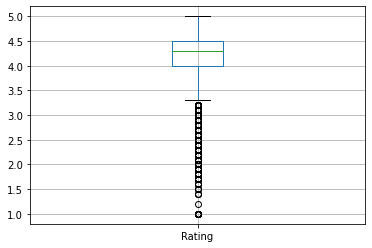

In [39]:
#check for possible outliers in rating, values are valid as values are within 1-5 region
boxplot = df.boxplot('Rating') 
boxplot.plot()

plt.show()

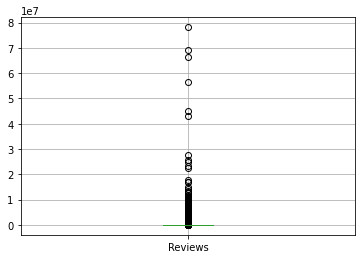

In [40]:
#check for possible outliers in reviews
boxplot = df.boxplot('Reviews') 
boxplot.plot()

plt.show()

In [41]:
#number of installation higher than the review, therfore valid
possible_outliers = df[df['Reviews']>1e+6]
possible_outliers 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,PriGenre,SecGenre,MinAndroidVer
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,0.0,100000000,Free,0.0,Teen,Books & Reference,2018-08-01,Varies with device,Varies with device,Books & Reference,Books & Reference,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,0.0,1000000000,Free,0.0,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device,Books & Reference,Books & Reference,Varies with device
189,Uber Driver,BUSINESS,4.4,1254730,0.0,10000000,Free,0.0,Everyone,Business,2018-08-03,Varies with device,Varies with device,Business,Business,Varies with device
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35000000.0,100000000,Free,0.0,Everyone,Business,2018-08-02,9.7.14188,4.1 and up,Business,Business,4.1
201,Facebook Pages Manager,BUSINESS,4.0,1279184,0.0,50000000,Free,0.0,Everyone,Business,2018-08-02,Varies with device,Varies with device,Business,Business,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9843,"Photo Lab Picture Editor: face effects, art fr...",PHOTOGRAPHY,4.5,1536512,0.0,50000000,Free,0.0,Everyone,Photography,2018-07-17,Varies with device,Varies with device,Photography,Photography,Varies with device
9851,MomentCam Cartoons & Stickers,PHOTOGRAPHY,4.2,1260143,0.0,50000000,Free,0.0,Everyone,Photography,2018-07-12,Varies with device,Varies with device,Photography,Photography,Varies with device
9860,Voice changer with effects,FAMILY,4.2,1260903,8700000.0,50000000,Free,0.0,Everyone,Entertainment,2018-08-02,3.4.8,4.1 and up,Entertainment,Entertainment,4.1
10636,FRONTLINE COMMANDO,GAME,4.4,1351833,12000000.0,10000000,Free,0.0,Teen,Action,2013-10-28,3.0.3,2.1 and up,Action,Action,2.1


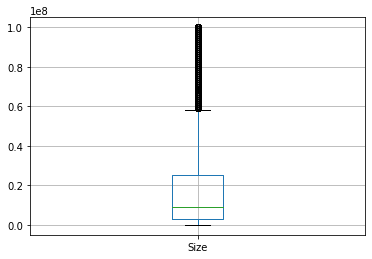

In [42]:
#checking size,valid, as some games are up to few hundered megabytes,thefore values are valid
boxplot = df.boxplot('Size') 
boxplot.plot()

plt.show()

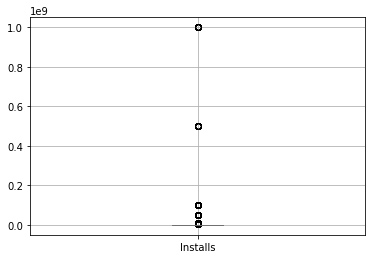

In [43]:
#checking for outliers for installs column
boxplot = df.boxplot('Installs') 
boxplot.plot()

plt.show()

In [44]:
#checking data for such high number of installs and the app installs amount is valid as all andriod phones has followin apps initially installed
possible_outliers = df[df['Installs']>1e+8]
possible_outliers

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,PriGenre,SecGenre,MinAndroidVer
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,0.0,1000000000,Free,0.0,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device,Books & Reference,Books & Reference,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,0.0,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,Communication,Communication,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0.0,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,Communication,Communication,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,0.0,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,Communication,Communication,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,0.0,1000000000,Free,0.0,Everyone,Communication,2018-08-02,Varies with device,Varies with device,Communication,Communication,Varies with device
341,Hangouts,COMMUNICATION,4.0,3419249,0.0,1000000000,Free,0.0,Everyone,Communication,2018-07-21,Varies with device,Varies with device,Communication,Communication,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,0.0,500000000,Free,0.0,Everyone,Communication,2018-07-18,Varies with device,Varies with device,Communication,Communication,Varies with device
347,imo free video calls and chat,COMMUNICATION,4.3,4785892,11000000.0,500000000,Free,0.0,Everyone,Communication,2018-06-08,9.8.000000010501,4.0 and up,Communication,Communication,4.0
371,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237,0.0,500000000,Free,0.0,Everyone,Communication,2018-07-31,37.1.206017801.DR37_RC14,4.4 and up,Communication,Communication,4.4
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000000.0,500000000,Free,0.0,Teen,Communication,2018-08-02,12.8.5.1121,4.0 and up,Communication,Communication,4.0


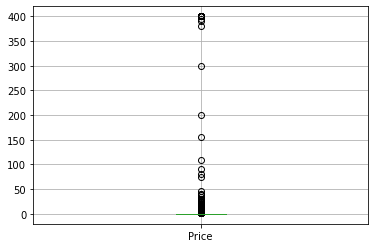

In [45]:
#checking for outliers for Price 
boxplot = df.boxplot('Price') 
boxplot.plot()

plt.show()

In [46]:
#check for possible outliers in price and after examination prices above $50 are deemed not valid and to be droppped
possible_outliers = df[df['Price']>50]
possible_outliers

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,PriGenre,SecGenre,MinAndroidVer
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000000.0,1000,Paid,79.99,Everyone,Medical,2018-06-18,19.0,4.0.3 and up,Medical,Medical,4.0.3
2390,Language Therapy: Aphasia,MEDICAL,4.3,10,28000000.0,1000,Paid,74.99,Everyone,Medical,2018-06-25,3.1.1,4.0.3 and up,Medical,Medical,4.0.3
4197,most expensive app (H),FAMILY,4.3,6,1500000.0,100,Paid,399.99,Everyone,Entertainment,2018-07-16,1.0,7.0 and up,Entertainment,Entertainment,7.0
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000000.0,10000,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up,Lifestyle,Lifestyle,4.4
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,10000,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up,Lifestyle,Lifestyle,4.1
5351,I am rich,LIFESTYLE,3.8,3547,1800000.0,100000,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up,Lifestyle,Lifestyle,4.0.3
5354,I am Rich Plus,FAMILY,4.0,856,8700000.0,10000,Paid,399.99,Everyone,Entertainment,2018-05-19,3.0,4.4 and up,Entertainment,Entertainment,4.4
5355,I am rich VIP,LIFESTYLE,3.8,411,2600000.0,10000,Paid,299.99,Everyone,Lifestyle,2018-07-21,1.1.1,4.3 and up,Lifestyle,Lifestyle,4.3
5356,I Am Rich Premium,FINANCE,4.1,1867,4700000.0,50000,Paid,399.99,Everyone,Finance,2017-11-12,1.6,4.0 and up,Finance,Finance,4.0
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900000.0,1000,Paid,379.99,Everyone,Lifestyle,2018-07-01,1.0,4.0 and up,Lifestyle,Lifestyle,4.0


In [47]:
#data cleaned for GooglePLayStore csv
drop_rows = df[df['Price']>50]
df = df.drop(drop_rows.index)

### Data Exploration and Cleaning of Google Play Store Reviews Data Set

In [48]:
#checking the reviews csv
rev

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [49]:
#checking datatypes for each column
rev.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

In [50]:
#checking total nulls in the reviews csv
rev.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [51]:
#checking the rows with null values
null_rows = rev[rev.isnull()]
null_rows.head(50)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN


In [52]:
#dropping all null rows
rev = rev.dropna()

In [53]:
#assgining numerical values to sentinment to allow aggregation of sentiment column
pd.options.mode.chained_assignment = None  # default='warn'
rev['Sentiment'] = rev['Sentiment'].replace({'Positive':'1' , 'Negative': '-1', 'Neutral': '0'})

In [54]:
#converting sentiment column to numerical data type from object data type
rev['Sentiment'] = pd.to_numeric(rev['Sentiment'])

In [55]:
#to aggreggate the sentiment,sentiment polarity and sentiment subjectivity by their repective app 
rev = rev.groupby('App').agg({'Sentiment':'mean','Sentiment_Polarity':'mean', 'Sentiment_Subjectivity':'mean'})

### Joining of Google App Store Apps and it's Respective Aggregated Reviews

In [56]:
#left joining of data bewtween the GooglePlayStore and it's respective reviews 
df = pd.merge(df,rev,on='App',how='left')

### Exporting Cleaned and Merged Data to CSV

In [57]:
#export cleaned data with reviews merged
df.to_csv('googleplaystore_clean.csv', index=False)